# FishNet Linear ViT-S16 Per-Class Performance Analysis

This notebook analyzes the per-class accuracy results from the linear evaluation of ViT-S16 on the FishNet dataset.

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the per-class accuracy data
with open('../artifacts/fishnet/linear_vits16/evaluation/per_class_accuracy.json', 'r') as f:
    data = json.load(f)

print("=" * 60)
print("OVERALL PERFORMANCE SUMMARY")
print("=" * 60)
print(f"Overall Accuracy: {data['overall_accuracy']:.4f} ({data['overall_accuracy']*100:.2f}%)")
print(f"Number of Classes: {data['num_classes']}")
print(f"Total Test Samples: {data['num_test_samples']}")
print(f"\nPer-Class Stats:")
print(f"  Mean Accuracy: {data['per_class_stats']['mean']:.4f} ({data['per_class_stats']['mean']*100:.2f}%)")
print(f"  Std Deviation: {data['per_class_stats']['std']:.4f}")
print(f"  Min Accuracy: {data['per_class_stats']['min']:.4f}")
print(f"  Max Accuracy: {data['per_class_stats']['max']:.4f}")
print("=" * 60)

OVERALL PERFORMANCE SUMMARY
Overall Accuracy: 0.7919 (79.19%)
Number of Classes: 570
Total Test Samples: 14220

Per-Class Stats:
  Mean Accuracy: 0.5353 (53.53%)
  Std Deviation: 0.3574
  Min Accuracy: 0.0000
  Max Accuracy: 1.0000


In [5]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(data['per_class_results'])

# Display basic statistics
print("\nDataFrame Shape:", df.shape)
print("\nFirst few classes:")
print(df.head(10))

print("\n" + "=" * 60)
print("DETAILED STATISTICS")
print("=" * 60)
print(f"\nAccuracy Distribution:")
print(df['accuracy'].describe())

print(f"\nTest Samples Distribution:")
print(df['test_samples'].describe())


DataFrame Shape: (455, 5)

First few classes:
   class_id       class_name  accuracy  test_samples  correct
0         6    Acropomatidae       0.0             1        0
1        13    Alepisauridae       0.0             1        0
2        23      Anabantidae       0.0             6        0
3        24      Anablepidae       0.0             1        0
4        27      Anchariidae       0.0             1        0
5        30  Anoplogastridae       0.0             1        0
6        36   Aphredoderidae       0.0             1        0
7        47     Ariommatidae       0.0             1        0
8        51    Astroblepidae       0.0             1        0
9        68   Bathyclupeidae       0.0             1        0

DETAILED STATISTICS

Accuracy Distribution:
count    455.000000
mean       0.535334
std        0.357789
min        0.000000
25%        0.250000
50%        0.600000
75%        0.839132
max        1.000000
Name: accuracy, dtype: float64

Test Samples Distribution:
count  

## 1. Accuracy Distribution Analysis

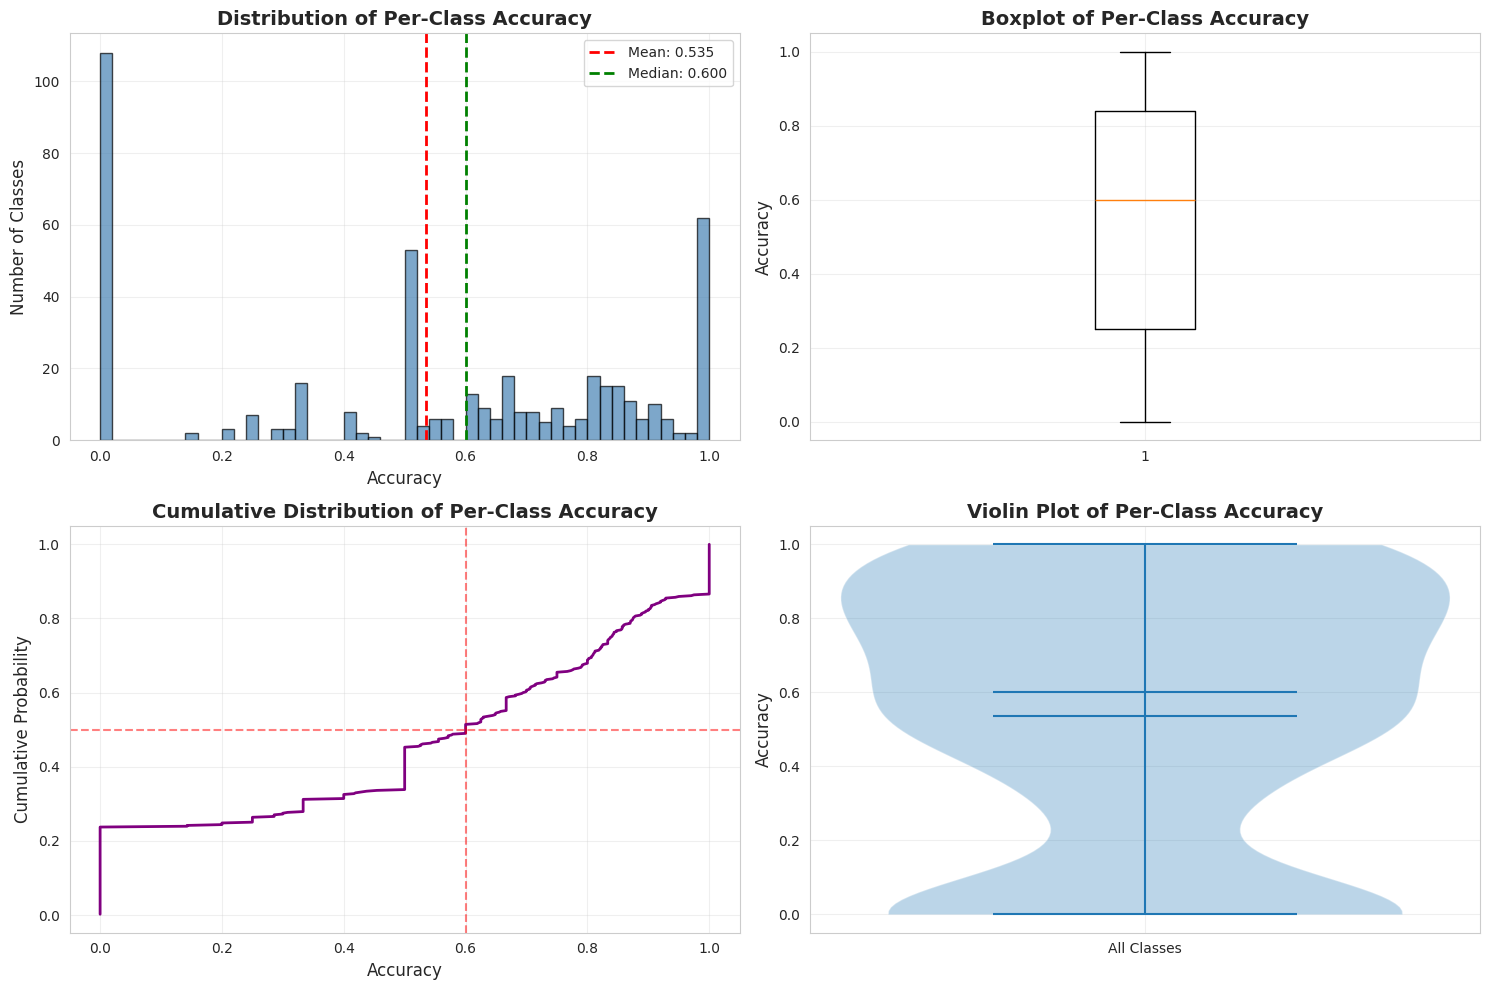


Accuracy Percentiles:
  10th percentile: 0.0000
  25th percentile: 0.2500
  50th percentile: 0.6000
  75th percentile: 0.8391
  90th percentile: 1.0000
  95th percentile: 1.0000
  99th percentile: 1.0000


In [6]:
# Create histogram and distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram of per-class accuracy
axes[0, 0].hist(df['accuracy'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df['accuracy'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["accuracy"].mean():.3f}')
axes[0, 0].axvline(df['accuracy'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["accuracy"].median():.3f}')
axes[0, 0].set_xlabel('Accuracy', fontsize=12)
axes[0, 0].set_ylabel('Number of Classes', fontsize=12)
axes[0, 0].set_title('Distribution of Per-Class Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Boxplot of accuracy
axes[0, 1].boxplot(df['accuracy'], vert=True)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].set_title('Boxplot of Per-Class Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. CDF of accuracy
sorted_accuracy = np.sort(df['accuracy'])
cdf = np.arange(1, len(sorted_accuracy) + 1) / len(sorted_accuracy)
axes[1, 0].plot(sorted_accuracy, cdf, linewidth=2, color='purple')
axes[1, 0].set_xlabel('Accuracy', fontsize=12)
axes[1, 0].set_ylabel('Cumulative Probability', fontsize=12)
axes[1, 0].set_title('Cumulative Distribution of Per-Class Accuracy', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(0.5, color='red', linestyle='--', alpha=0.5)
axes[1, 0].axvline(df['accuracy'].median(), color='red', linestyle='--', alpha=0.5)

# 4. Violin plot
parts = axes[1, 1].violinplot([df['accuracy']], vert=True, showmeans=True, showmedians=True)
axes[1, 1].set_ylabel('Accuracy', fontsize=12)
axes[1, 1].set_title('Violin Plot of Per-Class Accuracy', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks([1])
axes[1, 1].set_xticklabels(['All Classes'])
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key percentiles
print("\nAccuracy Percentiles:")
for p in [10, 25, 50, 75, 90, 95, 99]:
    percentile_val = np.percentile(df['accuracy'], p)
    print(f"  {p}th percentile: {percentile_val:.4f}")

## 2. Best and Worst Performing Classes

In [7]:
# Top 20 best performing classes
top_20 = df.nlargest(20, 'accuracy')[['class_name', 'accuracy', 'test_samples', 'correct']]
print("=" * 80)
print("TOP 20 BEST PERFORMING CLASSES")
print("=" * 80)
for i, row in top_20.iterrows():
    print(f"{row['class_name']:40s} | Acc: {row['accuracy']:.4f} | Samples: {row['test_samples']:3d} | Correct: {row['correct']:3d}")

# Bottom 20 worst performing classes (with at least 5 test samples)
df_filtered = df[df['test_samples'] >= 5]
bottom_20 = df_filtered.nsmallest(20, 'accuracy')[['class_name', 'accuracy', 'test_samples', 'correct']]
print("\n" + "=" * 80)
print("TOP 20 WORST PERFORMING CLASSES (with ≥5 test samples)")
print("=" * 80)
for i, row in bottom_20.iterrows():
    print(f"{row['class_name']:40s} | Acc: {row['accuracy']:.4f} | Samples: {row['test_samples']:3d} | Correct: {row['correct']:3d}")

TOP 20 BEST PERFORMING CLASSES
Acheilognathidae                         | Acc: 1.0000 | Samples:  10 | Correct:  10
Ambassidae                               | Acc: 1.0000 | Samples:   8 | Correct:   8
Anomalopidae                             | Acc: 1.0000 | Samples:   2 | Correct:   2
Anoplopomatidae                          | Acc: 1.0000 | Samples:   1 | Correct:   1
Antigoniidae                             | Acc: 1.0000 | Samples:   3 | Correct:   3
Apistidae                                | Acc: 1.0000 | Samples:   1 | Correct:   1
Aplocheilidae                            | Acc: 1.0000 | Samples:   9 | Correct:   9
Aplodactylidae                           | Acc: 1.0000 | Samples:   1 | Correct:   1
Badidae                                  | Acc: 1.0000 | Samples:   6 | Correct:   6
Berycidae                                | Acc: 1.0000 | Samples:   3 | Correct:   3
Bramidae                                 | Acc: 1.0000 | Samples:   5 | Correct:   5
Bregmacerotidae                   

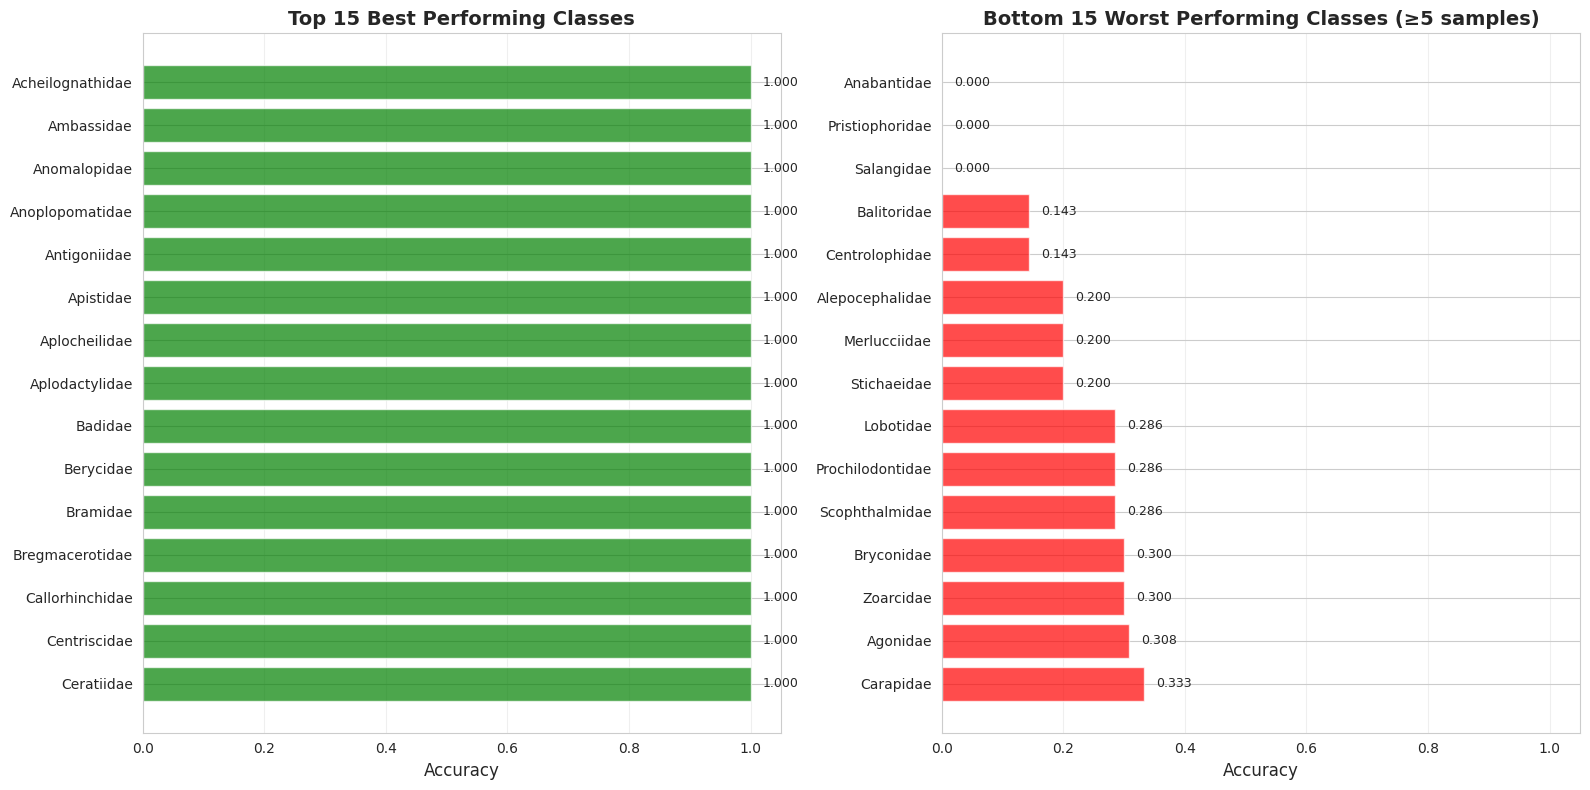

In [8]:
# Visualize top and bottom performers
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 performers
top_15 = df.nlargest(15, 'accuracy')
axes[0].barh(range(len(top_15)), top_15['accuracy'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15['class_name'], fontsize=10)
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_title('Top 15 Best Performing Classes', fontsize=14, fontweight='bold')
axes[0].set_xlim([0, 1.05])
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Add accuracy values on bars
for i, v in enumerate(top_15['accuracy']):
    axes[0].text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=9)

# Bottom 15 performers (with at least 5 samples)
bottom_15 = df_filtered.nsmallest(15, 'accuracy')
axes[1].barh(range(len(bottom_15)), bottom_15['accuracy'], color='red', alpha=0.7)
axes[1].set_yticks(range(len(bottom_15)))
axes[1].set_yticklabels(bottom_15['class_name'], fontsize=10)
axes[1].set_xlabel('Accuracy', fontsize=12)
axes[1].set_title('Bottom 15 Worst Performing Classes (≥5 samples)', fontsize=14, fontweight='bold')
axes[1].set_xlim([0, 1.05])
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Add accuracy values on bars
for i, v in enumerate(bottom_15['accuracy']):
    axes[1].text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 3. Relationship Between Test Samples and Accuracy

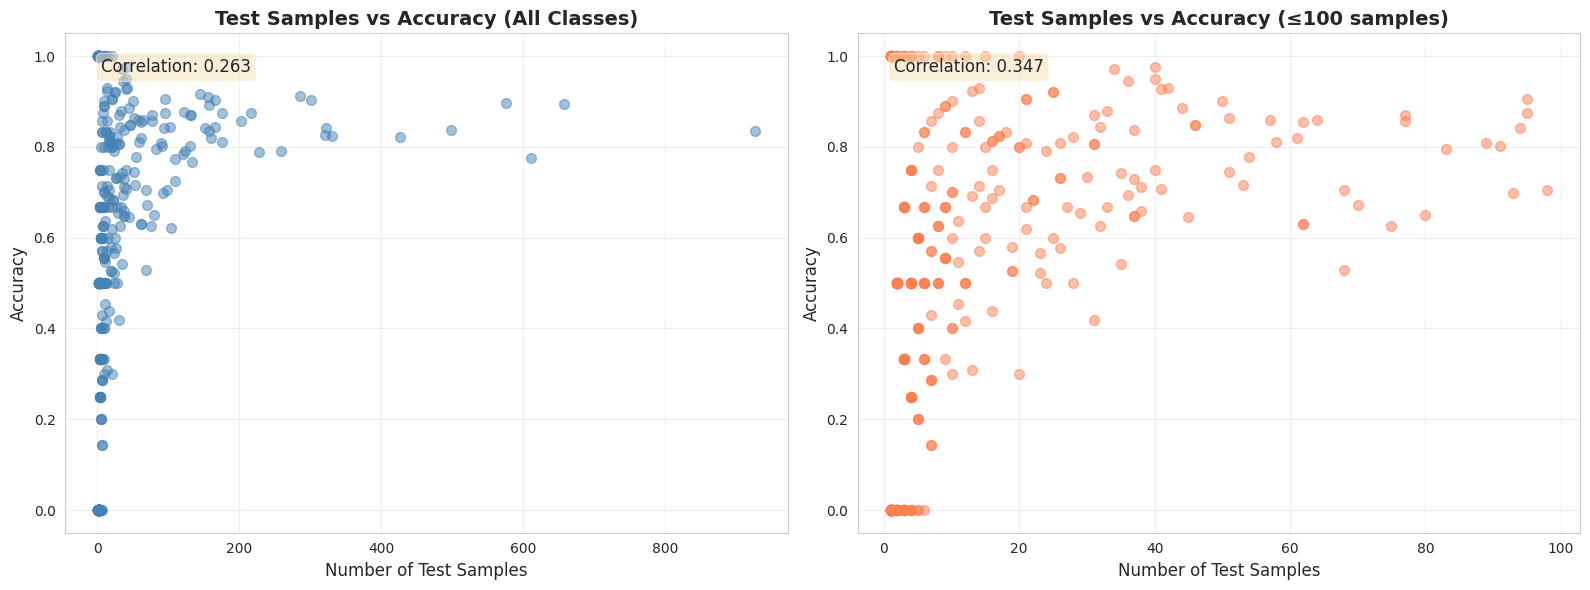


Correlation between test samples and accuracy (all): 0.2631
Correlation between test samples and accuracy (≤100 samples): 0.3474


In [9]:
# Scatter plot: test samples vs accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full scatter plot
axes[0].scatter(df['test_samples'], df['accuracy'], alpha=0.5, s=50, color='steelblue')
axes[0].set_xlabel('Number of Test Samples', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Test Samples vs Accuracy (All Classes)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Calculate correlation
correlation = df['test_samples'].corr(df['accuracy'])
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Zoomed scatter plot (test_samples <= 100)
df_zoomed = df[df['test_samples'] <= 100]
axes[1].scatter(df_zoomed['test_samples'], df_zoomed['accuracy'], alpha=0.5, s=50, color='coral')
axes[1].set_xlabel('Number of Test Samples', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Test Samples vs Accuracy (≤100 samples)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

correlation_zoomed = df_zoomed['test_samples'].corr(df_zoomed['accuracy'])
axes[1].text(0.05, 0.95, f'Correlation: {correlation_zoomed:.3f}', 
             transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nCorrelation between test samples and accuracy (all): {correlation:.4f}")
print(f"Correlation between test samples and accuracy (≤100 samples): {correlation_zoomed:.4f}")

## 4. Performance Categories Analysis

PERFORMANCE CATEGORIES
Excellent (≥90%)    :   82 classes (18.02%)
Good (70-90%)       :   99 classes (21.76%)
Fair (50-70%)       :  121 classes (26.59%)
Poor (30-50%)       :   30 classes ( 6.59%)
Very Poor (<30%)    :  123 classes (27.03%)


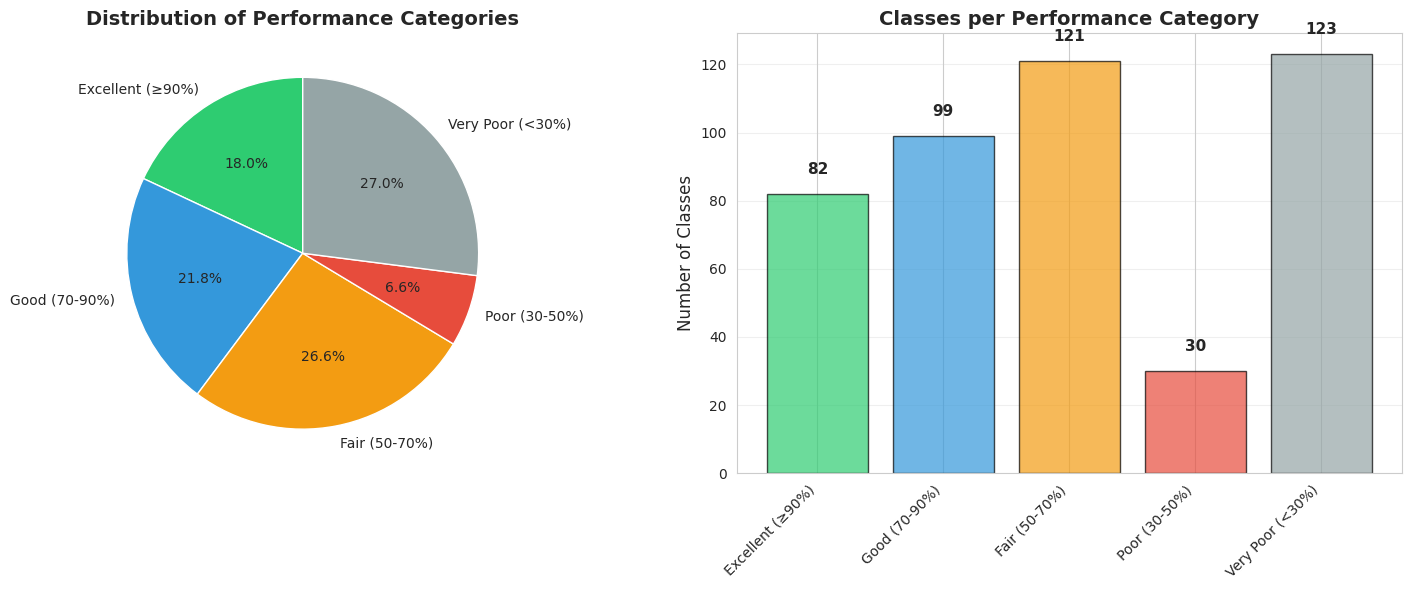

In [10]:
# Categorize classes by performance
def categorize_performance(acc):
    if acc >= 0.9:
        return 'Excellent (≥90%)'
    elif acc >= 0.7:
        return 'Good (70-90%)'
    elif acc >= 0.5:
        return 'Fair (50-70%)'
    elif acc >= 0.3:
        return 'Poor (30-50%)'
    else:
        return 'Very Poor (<30%)'

df['performance_category'] = df['accuracy'].apply(categorize_performance)

# Count classes in each category
category_counts = df['performance_category'].value_counts()
print("=" * 60)
print("PERFORMANCE CATEGORIES")
print("=" * 60)
for cat in ['Excellent (≥90%)', 'Good (70-90%)', 'Fair (50-70%)', 'Poor (30-50%)', 'Very Poor (<30%)']:
    count = category_counts.get(cat, 0)
    percentage = (count / len(df)) * 100
    print(f"{cat:20s}: {count:4d} classes ({percentage:5.2f}%)")

# Visualize performance categories
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
category_order = ['Excellent (≥90%)', 'Good (70-90%)', 'Fair (50-70%)', 'Poor (30-50%)', 'Very Poor (<30%)']
category_counts_ordered = [category_counts.get(cat, 0) for cat in category_order]

axes[0].pie(category_counts_ordered, labels=category_order, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 10})
axes[0].set_title('Distribution of Performance Categories', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(range(len(category_order)), category_counts_ordered, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(len(category_order)))
axes[1].set_xticklabels(category_order, rotation=45, ha='right', fontsize=10)
axes[1].set_ylabel('Number of Classes', fontsize=12)
axes[1].set_title('Classes per Performance Category', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, count in enumerate(category_counts_ordered):
    axes[1].text(i, count + 5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Sample Size Distribution Analysis

ACCURACY BY SAMPLE SIZE CATEGORY

1 sample:
  Number of classes: 94
  Mean accuracy: 0.3404
  Median accuracy: 0.0000
  Std accuracy: 0.4764

2-5 samples:
  Number of classes: 154
  Mean accuracy: 0.4144
  Median accuracy: 0.5000
  Std accuracy: 0.3365

6-10 samples:
  Number of classes: 55
  Mean accuracy: 0.5925
  Median accuracy: 0.5714
  Std accuracy: 0.2387

11-25 samples:
  Number of classes: 51
  Mean accuracy: 0.6978
  Median accuracy: 0.6923
  Std accuracy: 0.1801

26-50 samples:
  Number of classes: 39
  Mean accuracy: 0.7598
  Median accuracy: 0.7429
  Std accuracy: 0.1348

>50 samples:
  Number of classes: 62
  Mean accuracy: 0.8057
  Median accuracy: 0.8252
  Std accuracy: 0.0858


/tmp/ipykernel_4178605/2824455131.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(sample_data, labels=sample_categories, patch_artist=True)


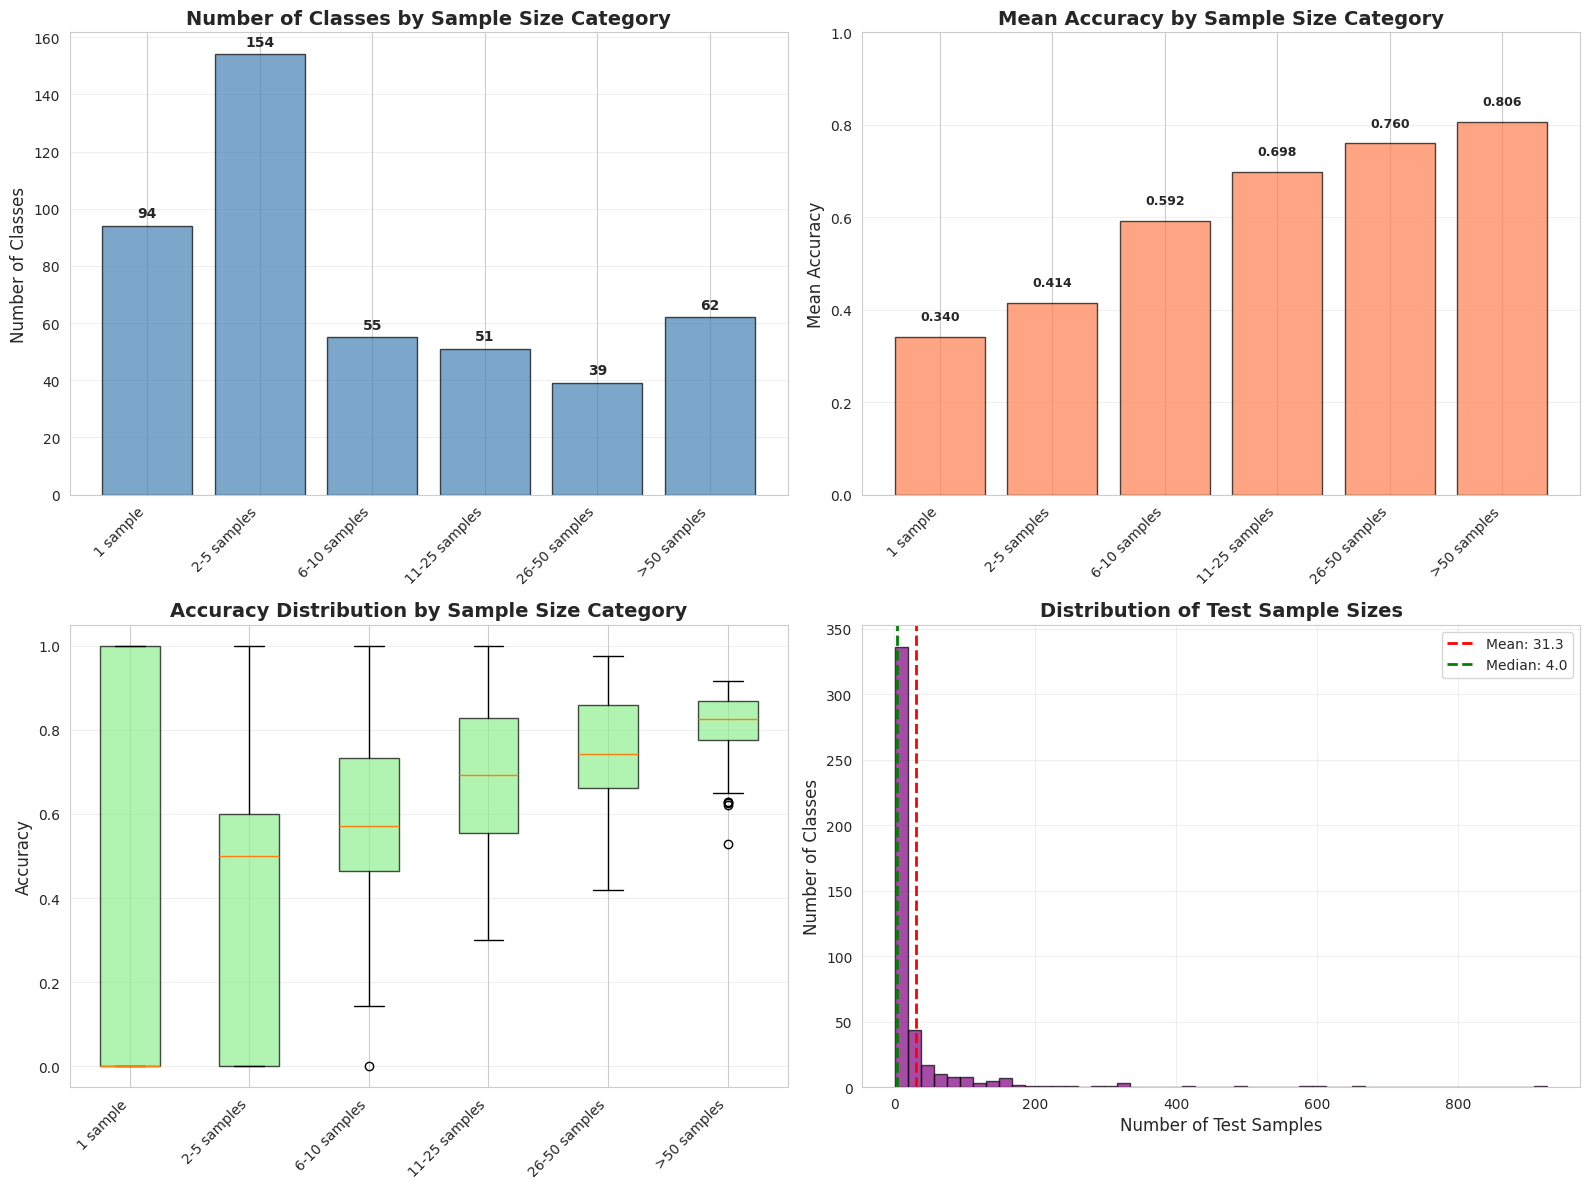

In [11]:
# Categorize by sample size
def categorize_samples(samples):
    if samples == 1:
        return '1 sample'
    elif samples <= 5:
        return '2-5 samples'
    elif samples <= 10:
        return '6-10 samples'
    elif samples <= 25:
        return '11-25 samples'
    elif samples <= 50:
        return '26-50 samples'
    else:
        return '>50 samples'

df['sample_category'] = df['test_samples'].apply(categorize_samples)

# Analyze accuracy by sample size category
sample_categories = ['1 sample', '2-5 samples', '6-10 samples', '11-25 samples', '26-50 samples', '>50 samples']
sample_stats = []

print("=" * 80)
print("ACCURACY BY SAMPLE SIZE CATEGORY")
print("=" * 80)
for cat in sample_categories:
    cat_df = df[df['sample_category'] == cat]
    if len(cat_df) > 0:
        print(f"\n{cat}:")
        print(f"  Number of classes: {len(cat_df)}")
        print(f"  Mean accuracy: {cat_df['accuracy'].mean():.4f}")
        print(f"  Median accuracy: {cat_df['accuracy'].median():.4f}")
        print(f"  Std accuracy: {cat_df['accuracy'].std():.4f}")
        sample_stats.append({
            'category': cat,
            'count': len(cat_df),
            'mean_acc': cat_df['accuracy'].mean(),
            'median_acc': cat_df['accuracy'].median(),
            'std_acc': cat_df['accuracy'].std()
        })

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Count of classes per sample category
sample_counts = df['sample_category'].value_counts()
sample_counts_ordered = [sample_counts.get(cat, 0) for cat in sample_categories]
axes[0, 0].bar(range(len(sample_categories)), sample_counts_ordered, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xticks(range(len(sample_categories)))
axes[0, 0].set_xticklabels(sample_categories, rotation=45, ha='right', fontsize=10)
axes[0, 0].set_ylabel('Number of Classes', fontsize=12)
axes[0, 0].set_title('Number of Classes by Sample Size Category', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, count in enumerate(sample_counts_ordered):
    axes[0, 0].text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Mean accuracy by sample category
mean_accs = [s['mean_acc'] for s in sample_stats]
axes[0, 1].bar(range(len(sample_stats)), mean_accs, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(len(sample_stats)))
axes[0, 1].set_xticklabels([s['category'] for s in sample_stats], rotation=45, ha='right', fontsize=10)
axes[0, 1].set_ylabel('Mean Accuracy', fontsize=12)
axes[0, 1].set_title('Mean Accuracy by Sample Size Category', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, acc in enumerate(mean_accs):
    axes[0, 1].text(i, acc + 0.03, f'{acc:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Box plots by sample category
sample_data = [df[df['sample_category'] == cat]['accuracy'].values for cat in sample_categories]
bp = axes[1, 0].boxplot(sample_data, labels=sample_categories, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightgreen')
    patch.set_alpha(0.7)
axes[1, 0].set_xticklabels(sample_categories, rotation=45, ha='right', fontsize=10)
axes[1, 0].set_ylabel('Accuracy', fontsize=12)
axes[1, 0].set_title('Accuracy Distribution by Sample Size Category', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Histogram of test samples
axes[1, 1].hist(df['test_samples'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Number of Test Samples', fontsize=12)
axes[1, 1].set_ylabel('Number of Classes', fontsize=12)
axes[1, 1].set_title('Distribution of Test Sample Sizes', fontsize=14, fontweight='bold')
axes[1, 1].axvline(df['test_samples'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["test_samples"].mean():.1f}')
axes[1, 1].axvline(df['test_samples'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {df["test_samples"].median():.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Classes with Zero Accuracy

In [12]:
# Classes with 0% accuracy
zero_acc_classes = df[df['accuracy'] == 0].sort_values('test_samples', ascending=False)

print("=" * 80)
print(f"CLASSES WITH 0% ACCURACY: {len(zero_acc_classes)} classes")
print("=" * 80)

# Group by sample size
print("\nBreakdown by sample size:")
sample_size_groups = zero_acc_classes.groupby('sample_category').size()
for cat in sample_categories:
    count = sample_size_groups.get(cat, 0)
    if count > 0:
        print(f"  {cat}: {count} classes")

print(f"\nClasses with 0% accuracy (sorted by test samples):")
print("-" * 80)
for i, row in zero_acc_classes.head(30).iterrows():
    print(f"{row['class_name']:40s} | Samples: {row['test_samples']:3d}")

if len(zero_acc_classes) > 30:
    print(f"\n... and {len(zero_acc_classes) - 30} more classes with 0% accuracy")

CLASSES WITH 0% ACCURACY: 108 classes

Breakdown by sample size:
  1 sample: 62 classes
  2-5 samples: 45 classes
  6-10 samples: 1 classes

Classes with 0% accuracy (sorted by test samples):
--------------------------------------------------------------------------------
Anabantidae                              | Samples:   6
Salangidae                               | Samples:   5
Pristiophoridae                          | Samples:   5
Cepolidae                                | Samples:   4
Synbranchidae                            | Samples:   4
Moringuidae                              | Samples:   4
Trachipteridae                           | Samples:   4
Gymnarchidae                             | Samples:   3
Chiasmodontidae                          | Samples:   3
Cynodontidae                             | Samples:   3
Bembridae                                | Samples:   3
Chlorophthalmidae                        | Samples:   3
Horabagridae                             | Samples:   3

## 7. Perfect Accuracy Classes

In [13]:
# Classes with 100% accuracy
perfect_acc_classes = df[df['accuracy'] == 1.0].sort_values('test_samples', ascending=False)

print("=" * 80)
print(f"CLASSES WITH 100% ACCURACY: {len(perfect_acc_classes)} classes")
print("=" * 80)

# Group by sample size
print("\nBreakdown by sample size:")
sample_size_groups = perfect_acc_classes.groupby('sample_category').size()
for cat in sample_categories:
    count = sample_size_groups.get(cat, 0)
    if count > 0:
        print(f"  {cat}: {count} classes")

print(f"\nClasses with 100% accuracy (sorted by test samples):")
print("-" * 80)
for i, row in perfect_acc_classes.head(30).iterrows():
    print(f"{row['class_name']:40s} | Samples: {row['test_samples']:3d}")

if len(perfect_acc_classes) > 30:
    print(f"\n... and {len(perfect_acc_classes) - 30} more classes with 100% accuracy")

CLASSES WITH 100% ACCURACY: 62 classes

Breakdown by sample size:
  1 sample: 32 classes
  2-5 samples: 22 classes
  6-10 samples: 5 classes
  11-25 samples: 3 classes

Classes with 100% accuracy (sorted by test samples):
--------------------------------------------------------------------------------
Serrasalmidae                            | Samples:  20
Pempheridae                              | Samples:  15
Leiognathidae                            | Samples:  12
Acheilognathidae                         | Samples:  10
Aplocheilidae                            | Samples:   9
Ambassidae                               | Samples:   8
Goodeidae                                | Samples:   8
Badidae                                  | Samples:   6
Bramidae                                 | Samples:   5
Chimaeridae                              | Samples:   4
Rhincodontidae                           | Samples:   4
Rhinidae                                 | Samples:   4
Centriscidae             